## Classification algorithms for classifying drugs

### Which is more accurate ? Let's see !!!

In [2]:
# Import all required packages for data analysis and visualization
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# Import the drug dataset
drug_data = pd.read_csv('drug200.csv')
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# Statistical measures of the drug dataset
drug_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
# Concise summary of the drug dataset
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
# Check for duplicate sum in the drug_data
drug_data.duplicated().sum()

0

In [7]:
# Check for duplicates - column wise
drug_data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
# Displays the datatypes of the columns in a drug dataset
drug_data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [9]:
# Number of records in the drug dataset
len(drug_data)

200

In [10]:
count = drug_data['Cholesterol'].value_counts()
count

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [11]:
count = drug_data['BP'].value_counts()
count

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [12]:
count = drug_data['Sex'].value_counts()
count

Sex
M    104
F     96
Name: count, dtype: int64

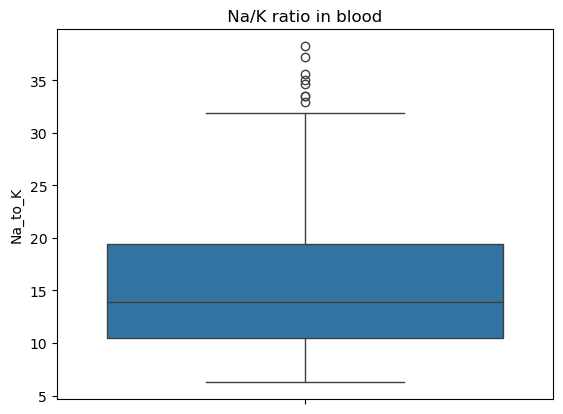

In [13]:
# Range of Na/K ratio of patients in drug_data
ax = sns.boxplot(drug_data['Na_to_K'])
ax.set_title(" Na/K ratio in blood ")
plt.show(ax)

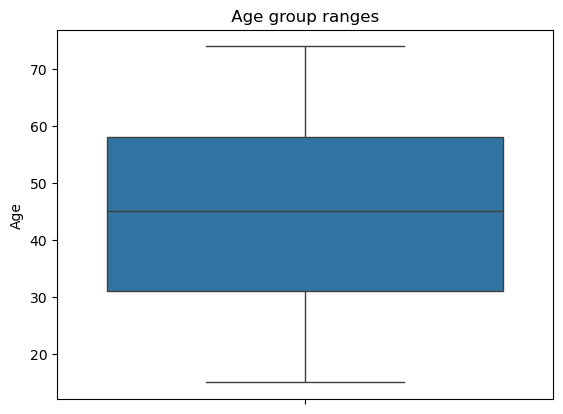

In [14]:
# Range of patients with age
ax = sns.boxplot(drug_data['Age'])
ax.set_title(" Age group ranges ")
plt.show(ax)

In [15]:
#Extract X and y from the dataframe , income column is the target column, rest columns are features
X = drug_data.loc[:,['Age','Sex','BP','Cholesterol','Na_to_K']]
y = drug_data.loc[:,'Drug']

In [16]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [17]:
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y = pd.DataFrame(y)
y.head()

,0
0,0
1,3
2,3
3,4
4,0


In [19]:
#First identify caterogical features and numeric features
numeric_features = X.select_dtypes('number')
categorical_features = X.select_dtypes('object')
categorical_features

,Sex,BP,Cholesterol
0,F,HIGH,HIGH
1,M,LOW,HIGH
2,M,LOW,HIGH
3,F,NORMAL,HIGH
4,F,LOW,HIGH
...,...,...,...
195,F,LOW,HIGH
196,M,LOW,HIGH
197,M,NORMAL,HIGH
198,M,NORMAL,NORMAL


In [20]:
numeric_features

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


In [21]:
#Method 1: Convert categorical features into numeric
converted_categorical_features = pd.get_dummies(categorical_features)
converted_categorical_features.shape
converted_categorical_features

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,True,False,True,False,False,True,False
1,False,True,False,True,False,True,False
2,False,True,False,True,False,True,False
3,True,False,False,False,True,True,False
4,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...
195,True,False,False,True,False,True,False
196,False,True,False,True,False,True,False
197,False,True,False,False,True,True,False
198,False,True,False,False,True,False,True


In [22]:
#combine the converted categorical features and the numeric features together into a new dataframe called "newX"
all_features = [converted_categorical_features, numeric_features]
newX = pd.concat(all_features,axis=1, join='inner')
newX.shape

(200, 9)

In [23]:
# Method 2:
# converting categorical drug_data into numerical drug_data
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# drug_data.iloc[:,5] = labelencoder.fit_transform(drug_data.iloc[:,5])
# drug_data["Sex"] = drug_data["Sex"].replace({"M": 1, "F": 0})
# drug_data["BP"] = drug_data["BP"].replace({"HIGH": 1,"LOW": 0, "NORMAL":0.5})
# drug_data["Cholesterol"] = drug_data["Cholesterol"].replace({"HIGH": 1, "LOW": 0, "NORMAL": 0.5})
# drug_data

In [24]:
# # Check the data 
# drug_data.head()

In [25]:
newX.columns

Index(['Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_HIGH',
       'Cholesterol_NORMAL', 'Age', 'Na_to_K'],
      dtype='object')

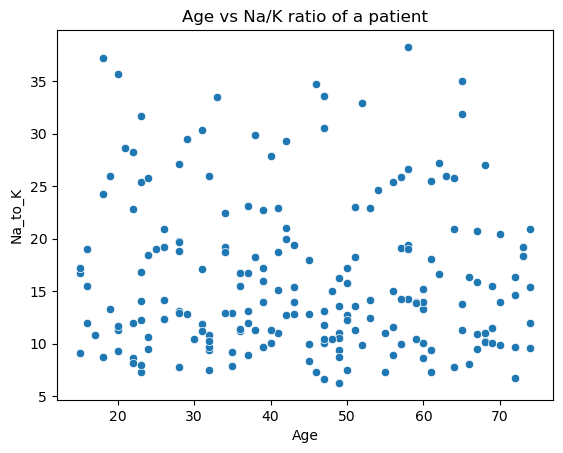

In [26]:
# Some of the visualizations regarding patient features for drug analysis

ax = sns.scatterplot(x = 'Age', y='Na_to_K', data = drug_data)
ax.set_title('Age vs Na/K ratio of a patient')
plt.show(ax)

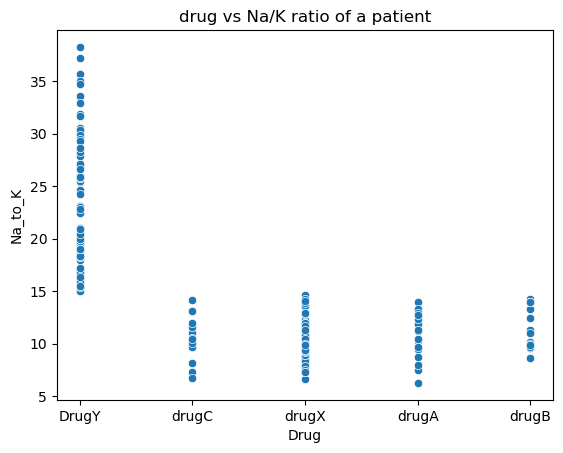

In [27]:
ax = sns.scatterplot(x = 'Drug', y='Na_to_K', data = drug_data)
ax.set_title('drug vs Na/K ratio of a patient')
plt.show(ax)

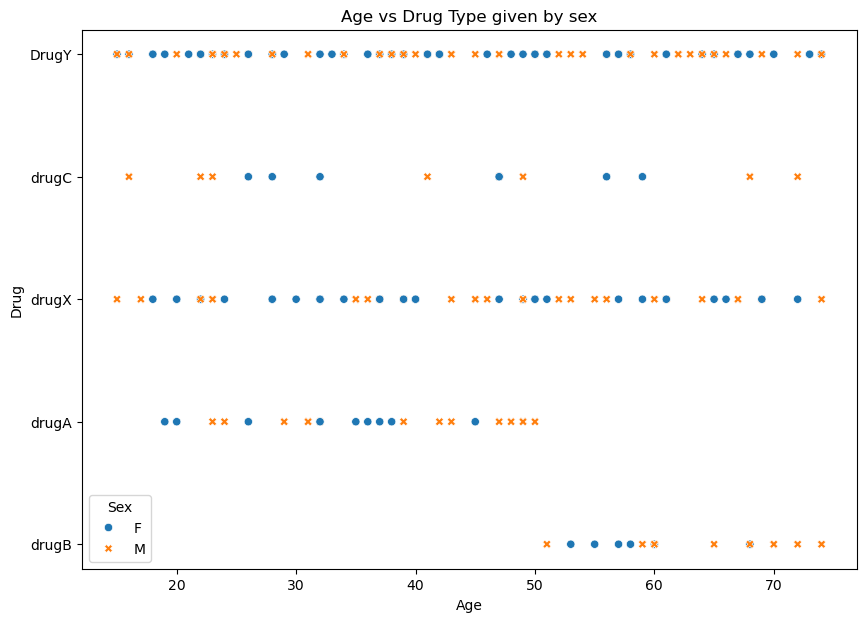

In [28]:
#Age with gender does not influence drug type given to a patient.
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(x = 'Age', y='Drug', 
                     hue='Sex', style='Sex', data=drug_data)
ax.set_title("Age vs Drug Type given by sex")
plt.show(ax)

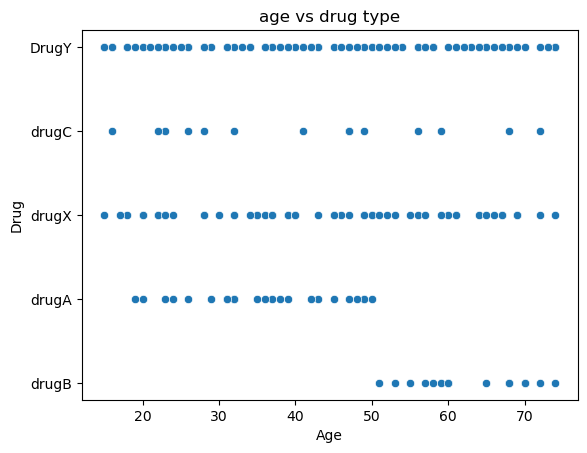

In [29]:
ax = sns.scatterplot(x = 'Age', y='Drug', data = drug_data)
ax.set_title('age vs drug type')
plt.show(ax)

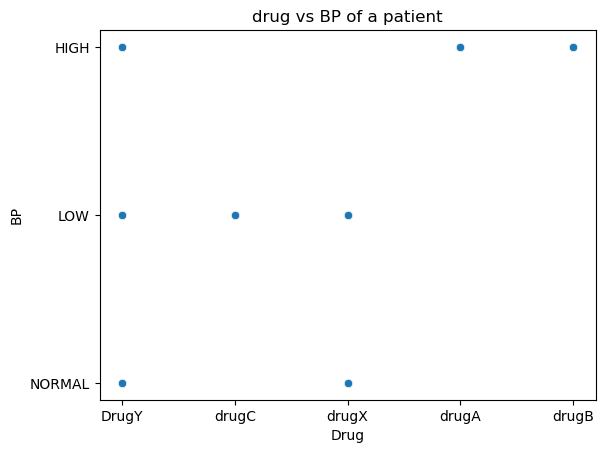

In [30]:
#It tells us that only people who have high BP are recommended 
#to take drugA and drugB, similarly drugC with Low BP.
ax = sns.scatterplot(x = 'Drug', y='BP', data = drug_data)
ax.set_title('drug vs BP of a patient')
plt.show(ax)

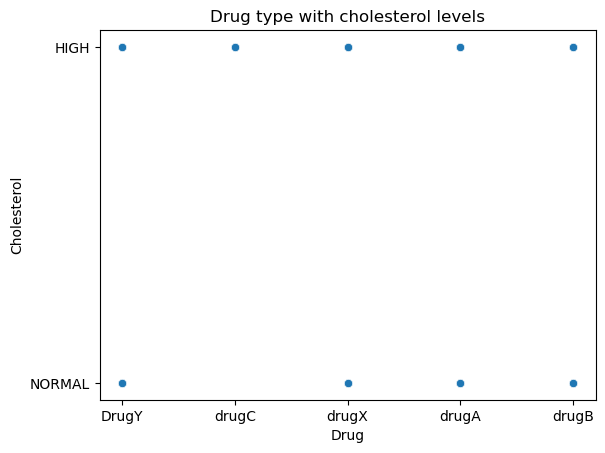

In [31]:
# It is suggested that patients with normal cholesterol 
#are not recommended with drugC.
ax = sns.scatterplot(x = 'Drug', y='Cholesterol', data = drug_data)
ax.set_title('Drug type with cholesterol levels')
plt.show(ax)

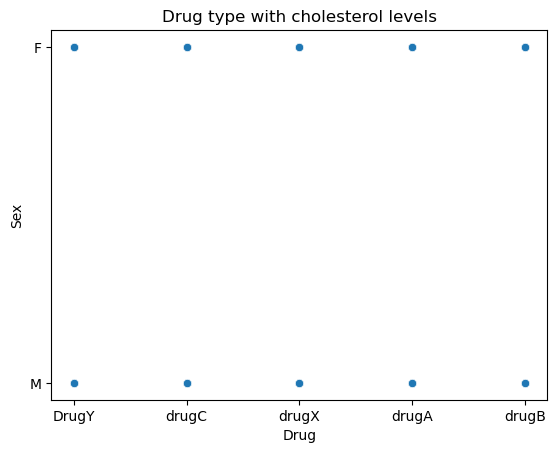

In [32]:
# Irrespective of gender the drug types are classified
ax = sns.scatterplot(x = 'Drug', y='Sex', data = drug_data)
ax.set_title('Drug type with cholesterol levels')
plt.show(ax)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

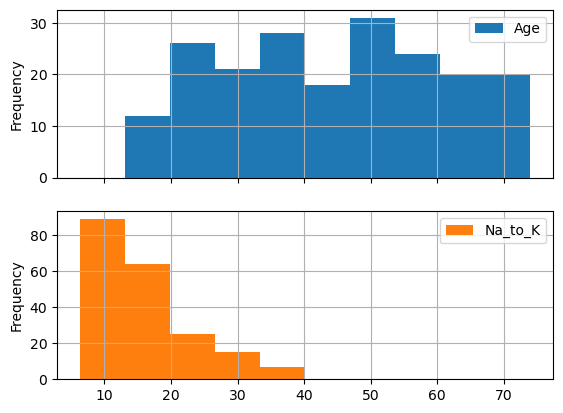

In [33]:
# By this analysis both Age and Na/K ratio are not correlated
drug_data.plot.hist( subplots = True, grid = True)

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Splitting the drug dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.2)

In [36]:
# RandomForestClassifier for drug classification
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.975

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a k-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (n_neighbors) as needed

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.875


In [42]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train , y_train)
y_predicted = naive_bayes.predict(X_test)

In [43]:
#Import metrics class from sklearn
from sklearn import metrics
 
metrics.accuracy_score(y_predicted , y_test)

0.775

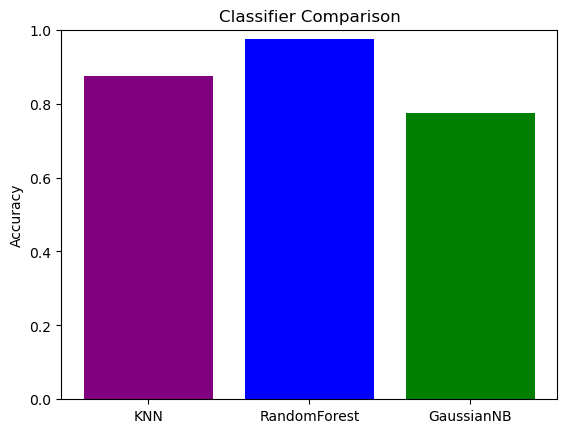

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you have already defined and split your dataset (X_train, X_test, y_train, y_test)

# Create classifiers
knn_clf = KNeighborsClassifier(n_neighbors=3)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
nb_clf = GaussianNB()

# Train the classifiers
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
nb_clf.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_clf.predict(X_test)
rf_predictions = rf_clf.predict(X_test)
nb_predictions = nb_clf.predict(X_test)

# Evaluate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Plot the comparison graph
classifiers = ['KNN', 'RandomForest', 'GaussianNB']
accuracies = [knn_accuracy, rf_accuracy, nb_accuracy]

plt.bar(classifiers, accuracies, color=['purple', 'blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Classifier Comparison')
plt.ylim(0, 1)
plt.show()


### We can conclude that RandomForestClassifier is the best fit algorithm for classifying drugs with 97% accuracy for the drug dataset taken above.